# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_long and cities
lat_long = []
cities = []

# Create a set of random lat and long combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
long = np.random.uniform(long_range[0], long_range[1], size=1500)
lat_long = zip(lats, long)

# Identify nearest city for each lat, long combination
for lat_long in lat_long:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url =  "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Set up lists to hold response info
latitude = []
longitude = []
max_temp = []
humidity = []
cloud_coverage = []
wind_speed = []
country = []
datetime = []
city_list = []
# Set up counters
record = 0
sets = 1

# Create print statement to start data retrieval
print(f"Beginning Retrieval")
print(f"-----------------------------")

# Loop through each city
for city in cities:
    
    # Start the counter and print number and city name currently retrieving data for
    record = record + 1
    print(f"Processing Record {record} of Set {sets} | {city}")
    
    # Create if statement to move to the next set when record hits 50     
    if record == 50:
        record = 0
        sets = sets + 1        
    
    # Try to perform a request for data on each and store in empty list
    try:
        
        # Build query URL
        query_url = f"{url}appid={weather_api_key}&units={units}&q="
        
        # Make request and store response 
        response = requests.get(query_url + city).json()
        
        # Append data to list
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud_coverage.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        datetime.append(response['dt'])
        city_list.append(response['name'])
    
    # Handle exceptions for a city that is not available with print statement
    except:
        print(f"City not found. Skipping...")
            
# Print statement for completion
print(f"---------------------------")
print(f"Retrieval Complete")
print(f"---------------------------")

Beginning Retrieval
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | zapolyarnyy
Processing Record 4 of Set 1 | chokurdakh
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | quatre cocos
Processing Record 8 of Set 1 | fevralsk
City not found. Skipping...
Processing Record 9 of Set 1 | kasempa
Processing Record 10 of Set 1 | coos bay
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | dwarka
Processing Record 14 of Set 1 | poum
Processing Record 15 of Set 1 | sarankhola
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | san cristobal
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | alexandria
Processing Record 22 of Set 1 

Processing Record 38 of Set 4 | avarua
Processing Record 39 of Set 4 | naze
Processing Record 40 of Set 4 | hasaki
Processing Record 41 of Set 4 | pangai
Processing Record 42 of Set 4 | saint-joseph
Processing Record 43 of Set 4 | chicama
Processing Record 44 of Set 4 | richards bay
Processing Record 45 of Set 4 | mount gambier
Processing Record 46 of Set 4 | cardston
Processing Record 47 of Set 4 | coquimbo
Processing Record 48 of Set 4 | zhezkazgan
Processing Record 49 of Set 4 | mar del plata
Processing Record 50 of Set 4 | gat
Processing Record 1 of Set 5 | sitka
Processing Record 2 of Set 5 | bambanglipuro
Processing Record 3 of Set 5 | melo
Processing Record 4 of Set 5 | treinta y tres
Processing Record 5 of Set 5 | avera
Processing Record 6 of Set 5 | kulhudhuffushi
Processing Record 7 of Set 5 | dudinka
Processing Record 8 of Set 5 | vao
Processing Record 9 of Set 5 | severo-kurilsk
Processing Record 10 of Set 5 | san patricio
Processing Record 11 of Set 5 | faanui
Processing R

Processing Record 27 of Set 8 | ust-tsilma
Processing Record 28 of Set 8 | naftah
City not found. Skipping...
Processing Record 29 of Set 8 | tagcatong
Processing Record 30 of Set 8 | fortuna
Processing Record 31 of Set 8 | antalaha
Processing Record 32 of Set 8 | manokwari
Processing Record 33 of Set 8 | nizhniy kuranakh
Processing Record 34 of Set 8 | depok
Processing Record 35 of Set 8 | belaya gora
Processing Record 36 of Set 8 | geraldton
Processing Record 37 of Set 8 | tawnat
City not found. Skipping...
Processing Record 38 of Set 8 | bull savanna
Processing Record 39 of Set 8 | tiznit
Processing Record 40 of Set 8 | dhidhdhoo
Processing Record 41 of Set 8 | yarensk
Processing Record 42 of Set 8 | bilma
Processing Record 43 of Set 8 | mehamn
Processing Record 44 of Set 8 | lasa
Processing Record 45 of Set 8 | bandarbeyla
Processing Record 46 of Set 8 | kargasok
Processing Record 47 of Set 8 | vung tau
Processing Record 48 of Set 8 | toliary
City not found. Skipping...
Processing 

Processing Record 17 of Set 12 | ponta delgada
Processing Record 18 of Set 12 | kirakira
Processing Record 19 of Set 12 | amga
Processing Record 20 of Set 12 | meulaboh
Processing Record 21 of Set 12 | pacifica
Processing Record 22 of Set 12 | higuey
City not found. Skipping...
Processing Record 23 of Set 12 | voh
Processing Record 24 of Set 12 | peniche
Processing Record 25 of Set 12 | axim
Processing Record 26 of Set 12 | byron bay
Processing Record 27 of Set 12 | roald
Processing Record 28 of Set 12 | minab
Processing Record 29 of Set 12 | provideniya
Processing Record 30 of Set 12 | tazovskiy
Processing Record 31 of Set 12 | tairua
Processing Record 32 of Set 12 | kerch
Processing Record 33 of Set 12 | wattegama
Processing Record 34 of Set 12 | waipawa
Processing Record 35 of Set 12 | saint-pierre
Processing Record 36 of Set 12 | sulangan
Processing Record 37 of Set 12 | adrar
Processing Record 38 of Set 12 | solnechnyy
Processing Record 39 of Set 12 | matara
Processing Record 40 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a DataFrame
weather_dict = {
    "City": city_list,
    "Lat": latitude,
    "Lng": longitude,
    "max temp": max_temp,
    "humidity": humidity,
    "cloudiness": cloud_coverage,
    "wind speed": wind_speed,
    "Country": country,
    "date": datetime }
weather_data_df = pd.DataFrame(weather_dict)

# Export the city data into a .csv
weather_data_df.to_csv(output_data_file, index = False)

# Display the DataFrame
weather_data_df.head()

,City,Lat,Lng,max temp,humidity,cloudiness,wind speed,Country,date
0,Butaritari,3.0707,172.7902,80.55,73,17,4.59,KI,1667877805
1,Ushuaia,-54.8000,-68.3000,55.02,54,20,5.75,AR,1667877530
2,Zapolyarnyy,69.4154,30.8136,27.68,94,86,3.51,RU,1667878365
3,Chokurdakh,70.6333,147.9167,-10.89,98,70,11.07,RU,1667878366
4,Albany,42.6001,-73.9662,48.63,58,4,10.40,US,1667877656


In [5]:

weather_data_df.describe()

,Lat,Lng,max temp,humidity,cloudiness,wind speed,date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,19.189518,23.007431,57.010073,72.388686,59.321168,7.607518,1.667878e+09
std,34.191112,90.336624,23.624924,20.555993,39.736920,5.128682,2.616520e+02
min,-54.800000,-175.200000,-23.820000,14.000000,0.000000,0.000000,1.667878e+09
25%,-9.818900,-53.411200,42.682500,61.000000,19.750000,3.870000,1.667878e+09
50%,22.157300,26.746450,62.950000,77.000000,75.000000,6.710000,1.667878e+09
75%,49.200000,101.858700,75.675000,88.000000,100.000000,9.895000,1.667879e+09
max,78.218600,179.316700,103.980000,100.000000,100.000000,38.270000,1.667879e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#describe has max of 100 humidity


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

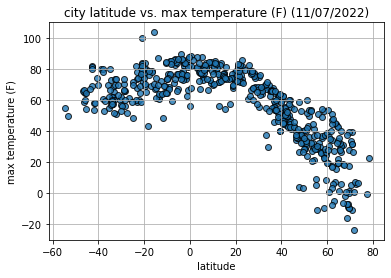

In [7]:
# Create a Scatter Plot for Latitude vs. Temperature
date = time.strftime("%m/%d/%Y")
x_values = weather_data_df['Lat']
y_values = weather_data_df['max temp']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolor = "k")
plt.xlabel('latitude')
plt.ylabel('max temperature (F)')
plt.title(f'city latitude vs. max temperature (F) ({date})')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitudeVsTemperaturePlot.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

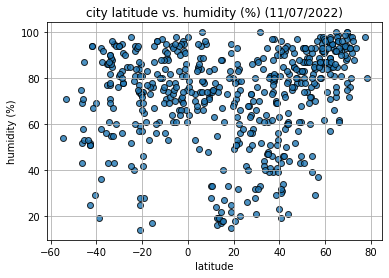

In [8]:
# Create a Scatter Plot for Latitude vs. Humidity
date = time.strftime("%m/%d/%Y")
x_values = weather_data_df['Lat']
y_values = weather_data_df['humidity']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('latitude')
plt.ylabel('humidity (%)')
plt.title(f'city latitude vs. humidity (%) ({date})')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitudeVsHumidtyPlot.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

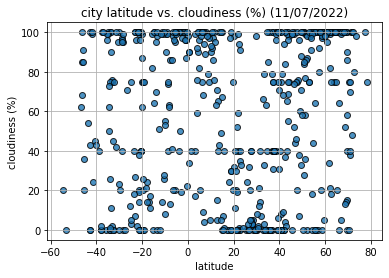

In [9]:
# Create a Scatter Plot for Latitude vs. Cloudiness
date = time.strftime("%m/%d/%Y")
x_values = weather_data_df['Lat']
y_values = weather_data_df['cloudiness']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('latitude')
plt.ylabel('cloudiness (%)')
plt.title(f'city latitude vs. cloudiness (%) ({date})')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitudeVsCloudinessPlot.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

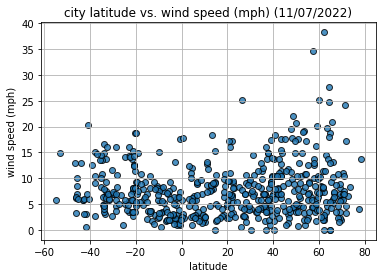

In [10]:
# Create a Scatter Plot for Latitude vs. Wind Speed
date = time.strftime("%m/%d/%Y")
x_values = weather_data_df['Lat']
y_values = weather_data_df['wind speed']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('latitude')
plt.ylabel('wind speed (mph)')
plt.title(f'city latitude vs. wind speed (mph) ({date})')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatitudeVsWindSpeedPlot.png")

# Show plot
plt.show()

## Linear Regression

In [11]:
# Create DataFrames for Northern and Southern Hemisphere
north = weather_data_df.loc[weather_data_df["Lat"] >= 0]
south = weather_data_df.loc[weather_data_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value: 0.7556316375249198


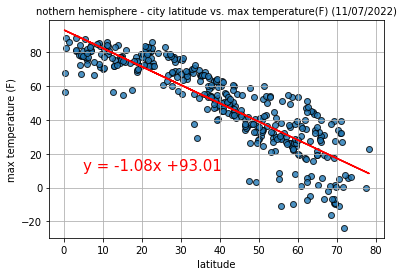

In [12]:
# Create a Scatter Plot for Latitude vs. Temperature for Northern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = north['Lat']
y_values = north['max temp']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(5,10),fontsize = 15,color = "red")
plt.xlabel('latitude')
plt.ylabel('max temperature (F)')
plt.title(f'nothern hemisphere - city latitude vs. max temperature(F) ({date})', fontsize = 10)
plt.grid(True)
print(f"r-value: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/NorthernHemisphereLatitudeVsTemperaturePlot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value: 0.24879580894205788


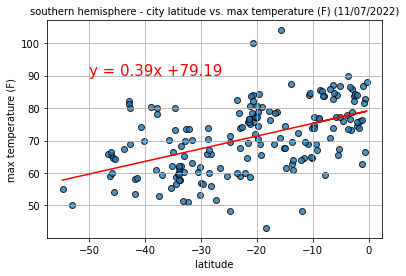

In [13]:
# Create a Scatter Plot for Latitude vs. Temperature for Southern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = south['Lat']
y_values = south['max temp']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(-50,90),fontsize = 15,color = "red")
plt.xlabel('latitude')
plt.ylabel('max temperature (F)')
plt.title(f'southern hemisphere - city latitude vs. max temperature (F) ({date})', fontsize = 10)
plt.grid(True)
print(f"r-value: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/SouthernHemisphereLatitudeVsTemperaturePlot.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value: 0.15497203234869658


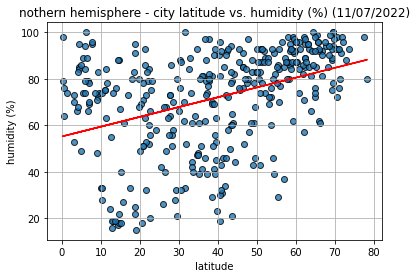

In [14]:
# Create a Scatter Plot for Latitude vs. Humidity for Northern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = north['Lat']
y_values = north['humidity']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(40,10),fontsize = 15,color = "red")
plt.xlabel('latitude')
plt.ylabel('humidity (%)')
plt.title(f'nothern hemisphere - city latitude vs. humidity (%) ({date})')
plt.grid(True)
print(f"r-value: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/NorthernHemisphereLatitudeVsHumidityPlot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value: 0.047982295125687004


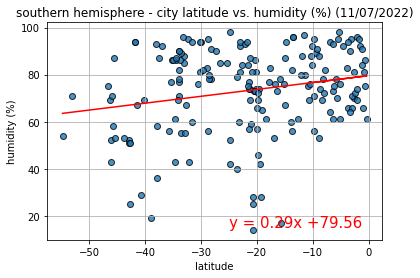

In [15]:
# Create a Scatter Plot for Latitude vs. Humidity for Southern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = south['Lat']
y_values = south['humidity']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(-25,15),fontsize = 15,color = "red")
plt.xlabel('latitude')
plt.ylabel('humidity (%)')
plt.title(f'southern hemisphere - city latitude vs. humidity (%) ({date})')
plt.grid(True)
print(f"r-value: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/SouthernHemisphereLatitudeVsHumidityPlot.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value: 0.04767005497425034


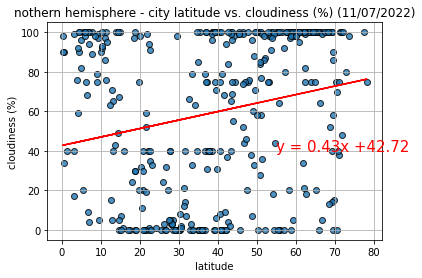

In [16]:
# Create a Scatter Plot for Latitude vs. Cloudiness for Northern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = north['Lat']
y_values = north['cloudiness']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(55,40),fontsize = 15,color = "red")
plt.xlabel('latitude')
plt.ylabel('cloudiness (%)')
plt.title(f'nothern hemisphere - city latitude vs. cloudiness (%) ({date})')
plt.grid(True)
print(f"r-value: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/NorthernHemisphereLatitudeVsCloudinessPlot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value: 0.06848121737934344


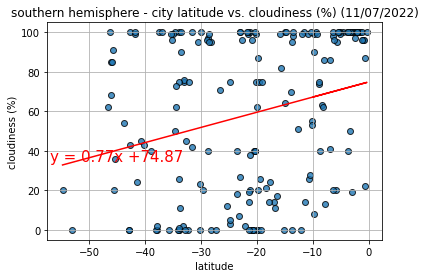

In [17]:
# Create a Scatter Plot for Latitude vs. Cloudiness for Southern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = south['Lat']
y_values = south['cloudiness']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(-57,35),fontsize = 15,color = "red")
plt.xlabel('latitude')
plt.ylabel('cloudiness (%)')
plt.title(f'southern hemisphere - city latitude vs. cloudiness (%) ({date})')
plt.grid(True)
print(f"r-value: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/SouthernHemisphereLatitudeVsCloudinessPlot.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value: 0.02966067088410629


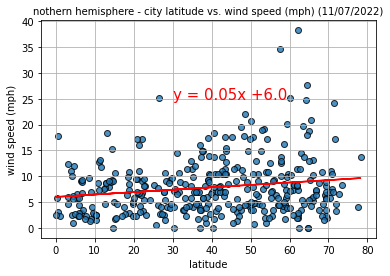

In [18]:
# Create a Scatter Plot for Latitude vs. Temperature for Northern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = north['Lat']
y_values = north['wind speed']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(30,25),fontsize = 15,color = "red")
plt.xlabel('latitude')
plt.ylabel('wind speed (mph)')
plt.title(f'nothern hemisphere - city latitude vs. wind speed (mph) ({date})', fontsize = 10)
plt.grid(True)
print(f"r-value: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/NorthernHemisphereLatitudeVsWindSpeedPlot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value: 0.09060458549861494


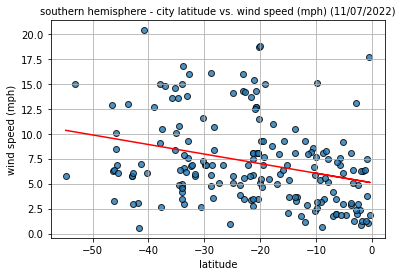

In [19]:
# Create a Scatter Plot for Latitude vs. Temperature for Southern Hemisphere
date = time.strftime("%m/%d/%Y")
x_values = south['Lat']
y_values = south['wind speed']

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq,(-57,25),fontsize = 15,color = "red")
plt.xlabel('latitude')
plt.ylabel('wind speed (mph)')
plt.title(f'southern hemisphere - city latitude vs. wind speed (mph) ({date})', fontsize = 10)
plt.grid(True)
print(f"r-value: {rvalue**2}") 

# Save the figure
plt.savefig("../output_data/SouthernHemisphereLatitudeVsWindSpeedPlot.png")

# Show plot
plt.show()